In [1]:
# for lecture use notebook
%matplotlib inline
qr_setting = None
qrviz_setting = 'save'
#
%config InlineBackend.figure_format='retina'
# import libraries
import numpy as np
import matplotlib as mpf
import pandas as pd
import matplotlib.pyplot as plt
import laUtilities as ut
import slideUtilities as sl
import demoUtilities as dm
import pandas as pd
import matplotlib.animation as animation
import matplotlib as mp
mp.rcParams['animation.html'] = 'jshtml'
from importlib import reload
from datetime import datetime
from IPython.display import Image
from IPython.display import display_html
from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML;

# Diagonalization

<center>

<img src="images/PottermoreDiagonAlley1.jpg" width = "450px">

</center>

<center>
<b>"Welcome, Harry, to Diagon Alley"</b>
<br>
<b>-- Rubeus Hagrid</b>
</center>

> Anyone who understands algebraic notation, reads at a glance in an equation results reached arithmetically only with great labour and pains. 
> 
> — Antoine-Augustin Cournot, 1838

Today we consider an important factorization of a square matrix.   

This factorization uses eigenvalues and eigenvectors, and makes many problems substantially easier.

Furthermore, it gives fundamental insight into the properties of a matrix.

Given a square matrix $A$, the factorization of $A$ is of the form 

$$A = PDP^{-1}$$

where $D$ is a __diagonal__ matrix.

Recall from last lecture, that the above equation means that $A$ and $D$ are __similar__ matrices.

So this factorization amounts to finding a $P$ that allows us to make $A$ similar to a __diagonal__ matrix.

This factorization allows us to 
* represent $A$ in a form that exposes the properties of $A$, 
* represent $A^k$ in an easy to use form, and
* compute $A^k$ quickly for large values of $k$.

Let's look at an example to show why this factorization is so important.

## Powers of a Diagonal Matrix

Consider taking the powers of a diagonal matrix.  

For example, $D = \begin{bmatrix}5&0\\0&3\end{bmatrix}.$  

Then note that $D^2 = \begin{bmatrix}5&0\\0&3\end{bmatrix}\begin{bmatrix}5&0\\0&3\end{bmatrix} = \begin{bmatrix}5^2&0\\0&3^2\end{bmatrix},$

And $D^3 = DD^2 = \begin{bmatrix}5&0\\0&3\end{bmatrix}\begin{bmatrix}5^2&0\\0&3^2\end{bmatrix} = \begin{bmatrix}5^3&0\\0&3^3\end{bmatrix}.$

So in general,

$$ D^k = \begin{bmatrix}5^k&0\\0&3^k\end{bmatrix} \;\;\;\mbox{for}\;k\geq1.$$

### Extending to a general matrix $A$

Now, consider if $A$ is __similar__ to a diagonal matrix.  

For example, let $A = PDP^{-1}$ for some invertible $P$ and diagonal $D$.

Then, $A^k$ is also easy to compute.   

__Example.__ 

Let $A = \begin{bmatrix}7&2\\-4&1\end{bmatrix}.$  

Find a formula for $A^k,$ given that $A = PDP^{-1},$ where

$$P = \begin{bmatrix}1&1\\-1&-2\end{bmatrix}\;\mbox{and}\;D = \begin{bmatrix}5&0\\0&3\end{bmatrix}.$$

__Solution.__   

The standard formula for the inverse of a $2\times 2$ matrix yields

$$P^{-1} = \begin{bmatrix}2&1\\-1&-1\end{bmatrix}$$

Then, by associativity of matrix multiplication,

$$A^2 = (PDP^{-1})(PDP^{-1}) $$

$$= PD(P^{-1}P)DP^{-1}$$

$$ = PDDP^{-1}$$

$$ = PD^2P^{-1}$$

$$ = \begin{bmatrix}1&1\\-1&-2\end{bmatrix}\begin{bmatrix}5^2&0\\0&3^2\end{bmatrix}\begin{bmatrix}2&1\\-1&-1\end{bmatrix}$$

So in general, for $k\geq 1,$

$$A^k = PD^kP^{-1}$$

$$=\begin{bmatrix}1&1\\-1&-2\end{bmatrix}\begin{bmatrix}5^k&0\\0&3^k\end{bmatrix}\begin{bmatrix}2&1\\-1&-1\end{bmatrix}$$

$$=\begin{bmatrix}2\cdot5^k-3^k&5^k-3^k\\2\cdot3^k-2\cdot5^k&2\cdot3^k-5^k\end{bmatrix}$$

Now, it is important to understand:

<center><font color = "blue">This factorization may not always be possible.</font></center>

Hence, we have a definition:

A square matrix $A$ is said to be __diagonalizable__ if $A$ is similar to a diagonal matrix.

That is, $A$ is diagonalizable we can find some invertible $P$ such that

$$A = PDP^{-1}$$ 

and $D$ is a diagonal matrix.

``` {toggle}
Question Time! Q18.1
```

## Diagonalization Requires Eigenvectors and Eigenvalues

Next we will show that to diagonalize a matrix, one __must__ use the eigenvectors and eigenvalues of $A$.

__Theorem.__ (The Diagonalization Theorem)

An $n\times n$ matrix $A$ is diagonalizable if and only if $A$ has $n$ __linearly independent__ eigenvectors.

In fact, 

$$A = PDP^{-1},$$ 

with $D$ a diagonal matrix, 

__if and only if__ the columns of $P$ are $n$ linearly independent eigenvectors of $A.$  

In this case, the __diagonal entries of $D$ are eigenvalues__ of $A$ that correspond, respectively, to the eigenvectors in $P$.

 In other words, $A$ is diagonalizable if and only if there are enough eigenvectors to form a basis of $\mathbb{R}^n$.  
 
We call such a basis an __eigenvector basis__ or an __eigenbasis__ of $\mathbb{R}^n$.

__Proof.__

First, we prove the "only if" part: if $A$ is diagonalizable, it has $n$ linearly independent eigenvectors.

Observe that if $P$ is any $n\times n$ matrix with columns $\mathbf{v}_1,\dots,\mathbf{v}_n,$ then

$$AP = A[\mathbf{v}_1\;\mathbf{v}_2\;\cdots\;\mathbf{v}_n] = [A\mathbf{v}_1\;A\mathbf{v}_2\;\cdots\;A\mathbf{v}_n]$$

next, note if $D$ is any diagonal matrix with diagonal entries $\lambda_1,\dots,\lambda_n,$

$$PD = P\begin{bmatrix}\lambda_1&0&\cdots&0\\0&\lambda_2&\cdots&0\\\vdots&\vdots&\ddots&\vdots\\0&0&\cdots&\lambda_n\end{bmatrix} = [\lambda_1\mathbf{v}_1\;\lambda_2\mathbf{v}_2\;\cdots\;\lambda_n\mathbf{v}_n].$$

Now suppose $A$ is diagonalizable and $A = PDP^{-1}.$  Then right-multiplying this relation by $P$, we have 

$$AP = PD$$

In this case, the calculations above show that

$$[A\mathbf{v}_1\;A\mathbf{v}_2\;\cdots\;A\mathbf{v}_n] = [\lambda_1\mathbf{v}_1\;\lambda_2\mathbf{v}_2\;\cdots\;\lambda_n\mathbf{v}_n].$$

Equating columns, we find that

$$A\mathbf{v}_1 = \lambda_1\mathbf{v}_1, \;\;\; A\mathbf{v}_2 = \lambda_2\mathbf{v}_2, \;\;\; \dots, \;\;\; A\mathbf{v}_n = \lambda_n\mathbf{v}_n$$

Since $P$ is invertible, its columns $\mathbf{v}_1, \dots,\mathbf{v}_n$ must be linearly independent.  

Also, since these columns are nonzero, the equations above show that $\lambda_1, \dots, \lambda_n$ are eigenvalues and $\mathbf{v}_1, \dots, \mathbf{v}_n$ are the corresponding eigenvectors.  

This proves the "only if" part of the theorem.

The "if" part of the theorem is: if $A$ has $n$ linearly independent eigenvectors, $A$ is diagonalizable.

This is straightforward: given $A$'s $n$ eigenvectors $\mathbf{v}_1,\dots,\mathbf{v}_n,$ use them to construct the columns of $P$ and use corresponding eigenvalues $\lambda_1, \dots, \lambda_n$ to construct $D$.  

Using the sequence of equations above in reverse order, we can go from 

$$A\mathbf{v}_1 = \lambda_1\mathbf{v}_1, \;\;\; A\mathbf{v}_2 = \lambda_2\mathbf{v}_2, \;\;\; \dots, \;\;\; A\mathbf{v}_n = \lambda_n\mathbf{v}_n$$

to 

$$AP = PD.$$

Since the eigenvectors are given as linearly independent, $P$ is invertible and so 

$$A = PDP^{-1}.$$

The takeaway is this:

Every $n\times n$ matrix having $n$ **linearly independent** eigenvectors can be factored into the product of 
* a matrix $P$, 
* a diagonal matrix $D$, and
* the inverse of $P$ 

... where $P$ holds the eigenvectors of $A$, and $D$ holds the eigenvalues of $A$.

This is the __eigendecomposition__ of $A$.   

(It is quite fundamental!)

``` {toggle}
Question Time! Q18.2
```

## Diagonalizing a Matrix

Let's put this all together and see how to diagonalize a matrix.

### Four Steps to Diagonalization

__Example.__  Diagonalize the following matrix, if possible.

$$A = \begin{bmatrix}1&3&3\\-3&-5&-3\\3&3&1\end{bmatrix}$$

That is, find an invertible matrix $P$ and a diagonal matrix $D$ such that $A = PDP^{-1}.$

#### Step 1: Find the eigenvalues of $A$.

This is routine for us now.  If we are working with $2\times2$ matrices, we may choose to find the roots of the characteristic polynomial (quadratic).  For anything larger we'd use a computer.

In this case, the characteristic equation turns out to involve a cubic polynomial that can be factored:

$$0 = \det(A-\lambda I) $$

$$ = -\lambda^3 - 3\lambda^2 + 4$$

$$ = -(\lambda -1)(\lambda +2)^2$$

So the eigenvalues are $\lambda = 1$ and $\lambda = -2$ (with multiplicity two).

#### Step 2: Find three linearly independent eigenvectors of $A$.

Note that we need _three_ linearly independent vectors because $A$ is $3\times3.$  

<center><font color = "blue">This is the step at which, if <em>A</em> cannot be diagonalized, we find out</font></center>

... because we cannot find 3 linearly independent eigenvectors.

Using our standard method (finding the nullspace of $A - \lambda I$) we find a basis for each eigenspace:

Basis for $\lambda = 1$: $\mathbf{v}_1 = \begin{bmatrix}1\\-1\\1\end{bmatrix}.$

Basis for $\lambda = -2$: $\mathbf{v}_2 = \begin{bmatrix}-1\\1\\0\end{bmatrix}$ and $\mathbf{v}_3 = \begin{bmatrix}-1\\0\\1\end{bmatrix}.$

At this point we must ensure that $\{\mathbf{v}_1, \mathbf{v}_2, \mathbf{v}_3\}$ forms a linearly independent set.

(These vectors in fact do.)

#### Step 3: Construct $P$ from the vectors in Step 2.

The order of the vectors is actually not important.

$$P = [\mathbf{v}_1\;\mathbf{v}_2\;\mathbf{v}_3] = \begin{bmatrix}1&-1&-1\\-1&1&0\\1&0&1\end{bmatrix}.$$

#### Step 4: Construct $D$ from the corresponding eigenvalues.

The order of eigenvalues must match the order of eigenvectors used in the previous step.

If an eigenvalue has multiplicity greater than 1, then repeat it the corresponding number of times.

$$D = \begin{bmatrix}1&0&0\\0&-2&0\\0&0&-2\end{bmatrix}.$$

And we are done.   We have diagonalized $A$:

$$A =  \begin{bmatrix}1&3&3\\-3&-5&-3\\3&3&1\end{bmatrix} = \begin{bmatrix}1&-1&-1\\-1&1&0\\1&0&1\end{bmatrix}  \begin{bmatrix}1&0&0\\0&-2&0\\0&0&-2\end{bmatrix}\begin{bmatrix}1&-1&-1\\-1&1&0\\1&0&1\end{bmatrix}^{-1}$$

So, just as a reminder, we can now take powers of $A$ quite efficiently:

$$A^{100} = \begin{bmatrix}1&-1&-1\\-1&1&0\\1&0&1\end{bmatrix}  \begin{bmatrix}1^{100}&0&0\\0&(-2)^{100}&0\\0&0&(-2)^{100}\end{bmatrix}\begin{bmatrix}1&-1&-1\\-1&1&0\\1&0&1\end{bmatrix}^{-1}$$

### When Diagonalization Fails

__Example.__   Let's look at an example of how diagonalization can fail.

Diagonalize the following matrix, if possible.

$$A = \begin{bmatrix}2&4&3\\-4&-6&-3\\3&3&1\end{bmatrix}.$$

__Solution.__ The characteristic equation of $A$ turns out to be the same as in the last example:

$$0 = \det(A-\lambda I) = -(\lambda-1)(\lambda +2)^2$$

The eigenvalues are $\lambda = 1$ and $\lambda = -2.$  However, it is easy to verify that each eigenspace is only one-dimensional:

Basis for $\lambda_1 = 1$: $\mathbf{v}_1 = \begin{bmatrix}1\\-1\\1\end{bmatrix}.$

Basis for $\lambda_2 = -2$: $\mathbf{v}_2 = \begin{bmatrix}-1\\1\\0\end{bmatrix}.$

There are not other eigenvalues, and every eigenvector of $A$ is a multiple of either $\mathbf{v}_1$ or $\mathbf{v}_2.$  

Hence it is impossible to construct a basis of $\mathbb{R}^3$ using eigenvectors of $A$. 

So we conclude that $A$ is __not__ diagonalizable.

### An Important Case

There is an important situation in which we can conclude immediately that $A$ is diagonalizable, without explicitly constructing and testing the eigenspaces of $A$.

__Theorem.__

An $n\times n$ matrix with $n$ distinct eigenvalues is diagonalizable.

__Proof__
Omitted, but easy.

__Example.__

Determine if the following matrix is diagonalizable.

$$A = \begin{bmatrix}5&-8&1\\0&0&7\\0&0&-2\end{bmatrix}.$$

__Solution.__

It's easy!  Since $A$ is triangular, its eigenvalues are $5, 0,$ and $-2$.  Since $A$ is a $3\times3$ with 3 distinct eigenvalues, $A$ is diagonalizable.

``` {toggle}
Question Time! Q18.3
```

## Diagonalization as a Change of Basis

We can now turn to an understanding of how diagonalization informs us about the properties of $A$.

Let's interpret the diagonalization $A = PDP^{-1}$ in terms of how $A$ acts as a linear operator.

When thinking of $A$ as a linear operator, diagonalization has a specific interpretation: 

<center><font color = "blue">Diagonalization separates the influence of each vector component from the others.</font></center>

Intuitively, the point to see is that when we multiply a vector $\mathbf{x}$ by a diagonal matrix $D$, the change to each component of $\mathbf{x}$ depends only on that component.  

That is, multiplying by a diagonal matrix simply __scales__ the components of the vector.

On the other hand, when we multiply by a matrix $A$ that has off-diagonal entries, the components of $\mathbf{x}$ affect each other.

So diagonalizing a matrix allows us to bring intuition to its behavior as as linear operator.

### Interpreting Diagonalization Geometrically

When we compute $P\mathbf{x},$ we are taking a vector sum of the columns of $P$:

$$P\mathbf{x} = \mathbf{p}_1 x_1 + \mathbf{p}_2 x_2 + \dots \mathbf{p}_n x_n.$$

Now $P$ is invertible, so its columns are a basis for $\mathbb{R}^n$.  Let's call that basis  $\mathcal{B} = \{\mathbf{p}_1, \mathbf{p}_2, \dots, \mathbf{p}_n\}.$  

So, we can think of $P\mathbf{x}$ as "the point that has coordinates $\mathbf{x}$ in the basis $\mathcal{B}$."   

On the other hand, what if we wanted to __find__ the coordinates of a vector in basis $\mathcal{B}$?

Let's say we have some $\mathbf{y}$, and we want to find its coordinates in the basis B.

So $\mathbf{y} = P\mathbf{x}.$

Then since $P$ is invertible, $\mathbf{x} = P^{-1} \mathbf{y}.$

Thus, $P^{-1} \mathbf{y}$ is "the coordinates of $\mathbf{y}$ in the basis $\mathcal{B}.$"

So we can interpret $PDP^{-1}\mathbf{x}$ as:

1) Compute the coordinates of $\mathbf{x}$ in the basis $\mathcal{B}$.   

This is $P^{-1}\mathbf{x}.$

2) Scale those coordinates according to the diagonal matrix $D$.   

This is $DP^{-1}\mathbf{x}.$

3) Find the point that has those scaled coordinates in the basis $\mathcal{B}.$ 
 
This is $PDP^{-1}\mathbf{x}.$
    

Let's visualize diagonalization geometrically.

Here is $A$ transforming a point $\mathbf{x} = \begin{bmatrix}2.47\\1.25\end{bmatrix}$.

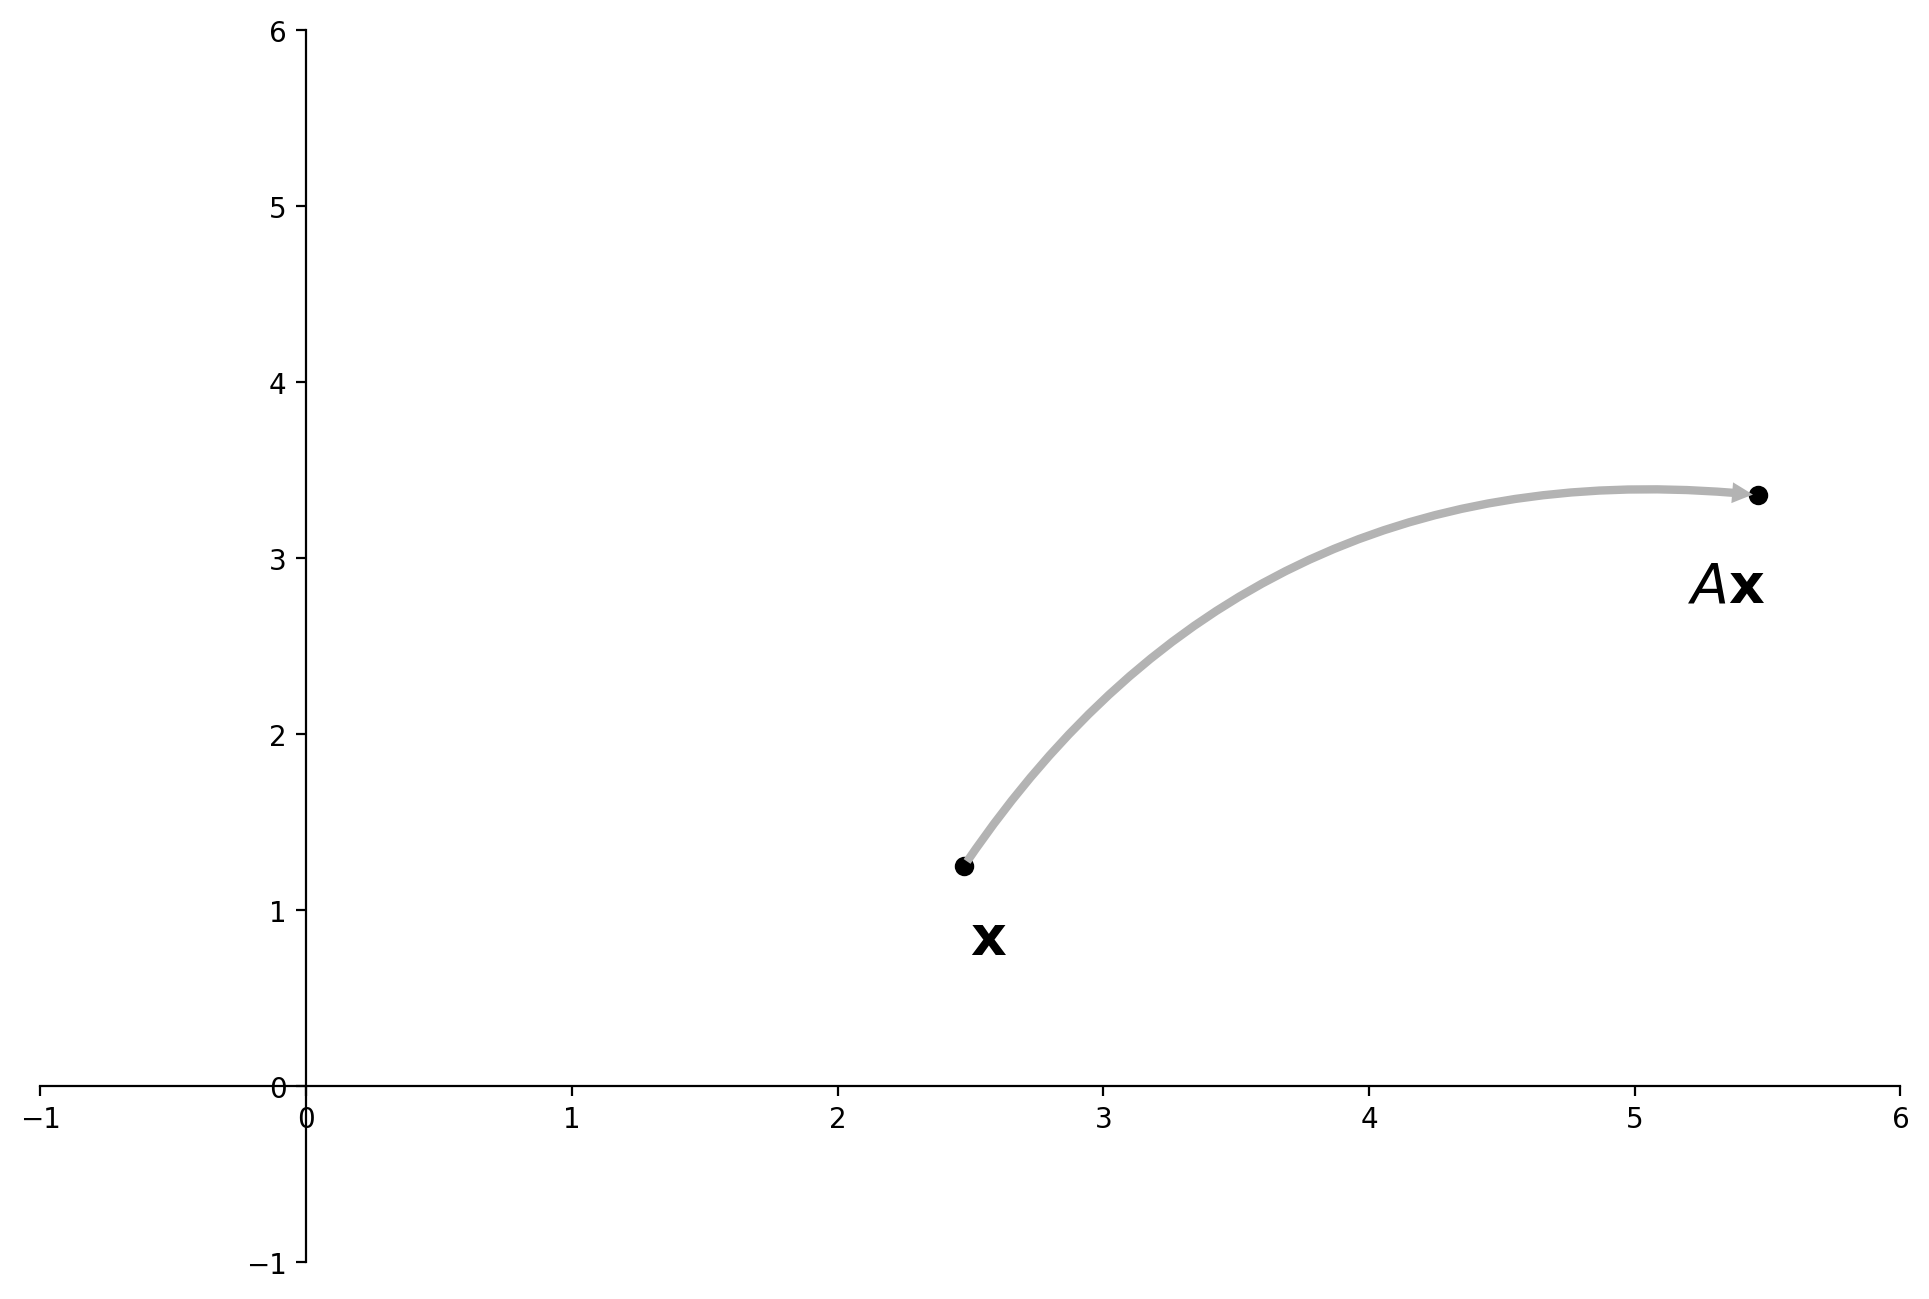

In [2]:
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
# ut.plotVec(ax,v1,'b')
# ut.plotVec(ax,v2)
# ut.plotLinEqn(-v1[1],v1[0],0,color='b')
# ut.plotLinEqn(-v2[1],v2[0],0,color='r')
# for i in range(-4,8):
#    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
#    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
                xytext=(p1[0], p1[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.7', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
ax.text(2.5,0.75,r'${\bf x}$',size=20)
ax.text(5.2,2.75,r'$A{\bf x}$',size=20)
ax.plot(0,0,'');

Now, let's compute $P^{-1}\mathbf{x}.$

Remember that the columns of $P$ are the eigenvectors of $A$.

So $P^{-1}\mathbf{x}$ is the coordinates of the point $\mathbf{x}$ in the __eigenvector basis__:

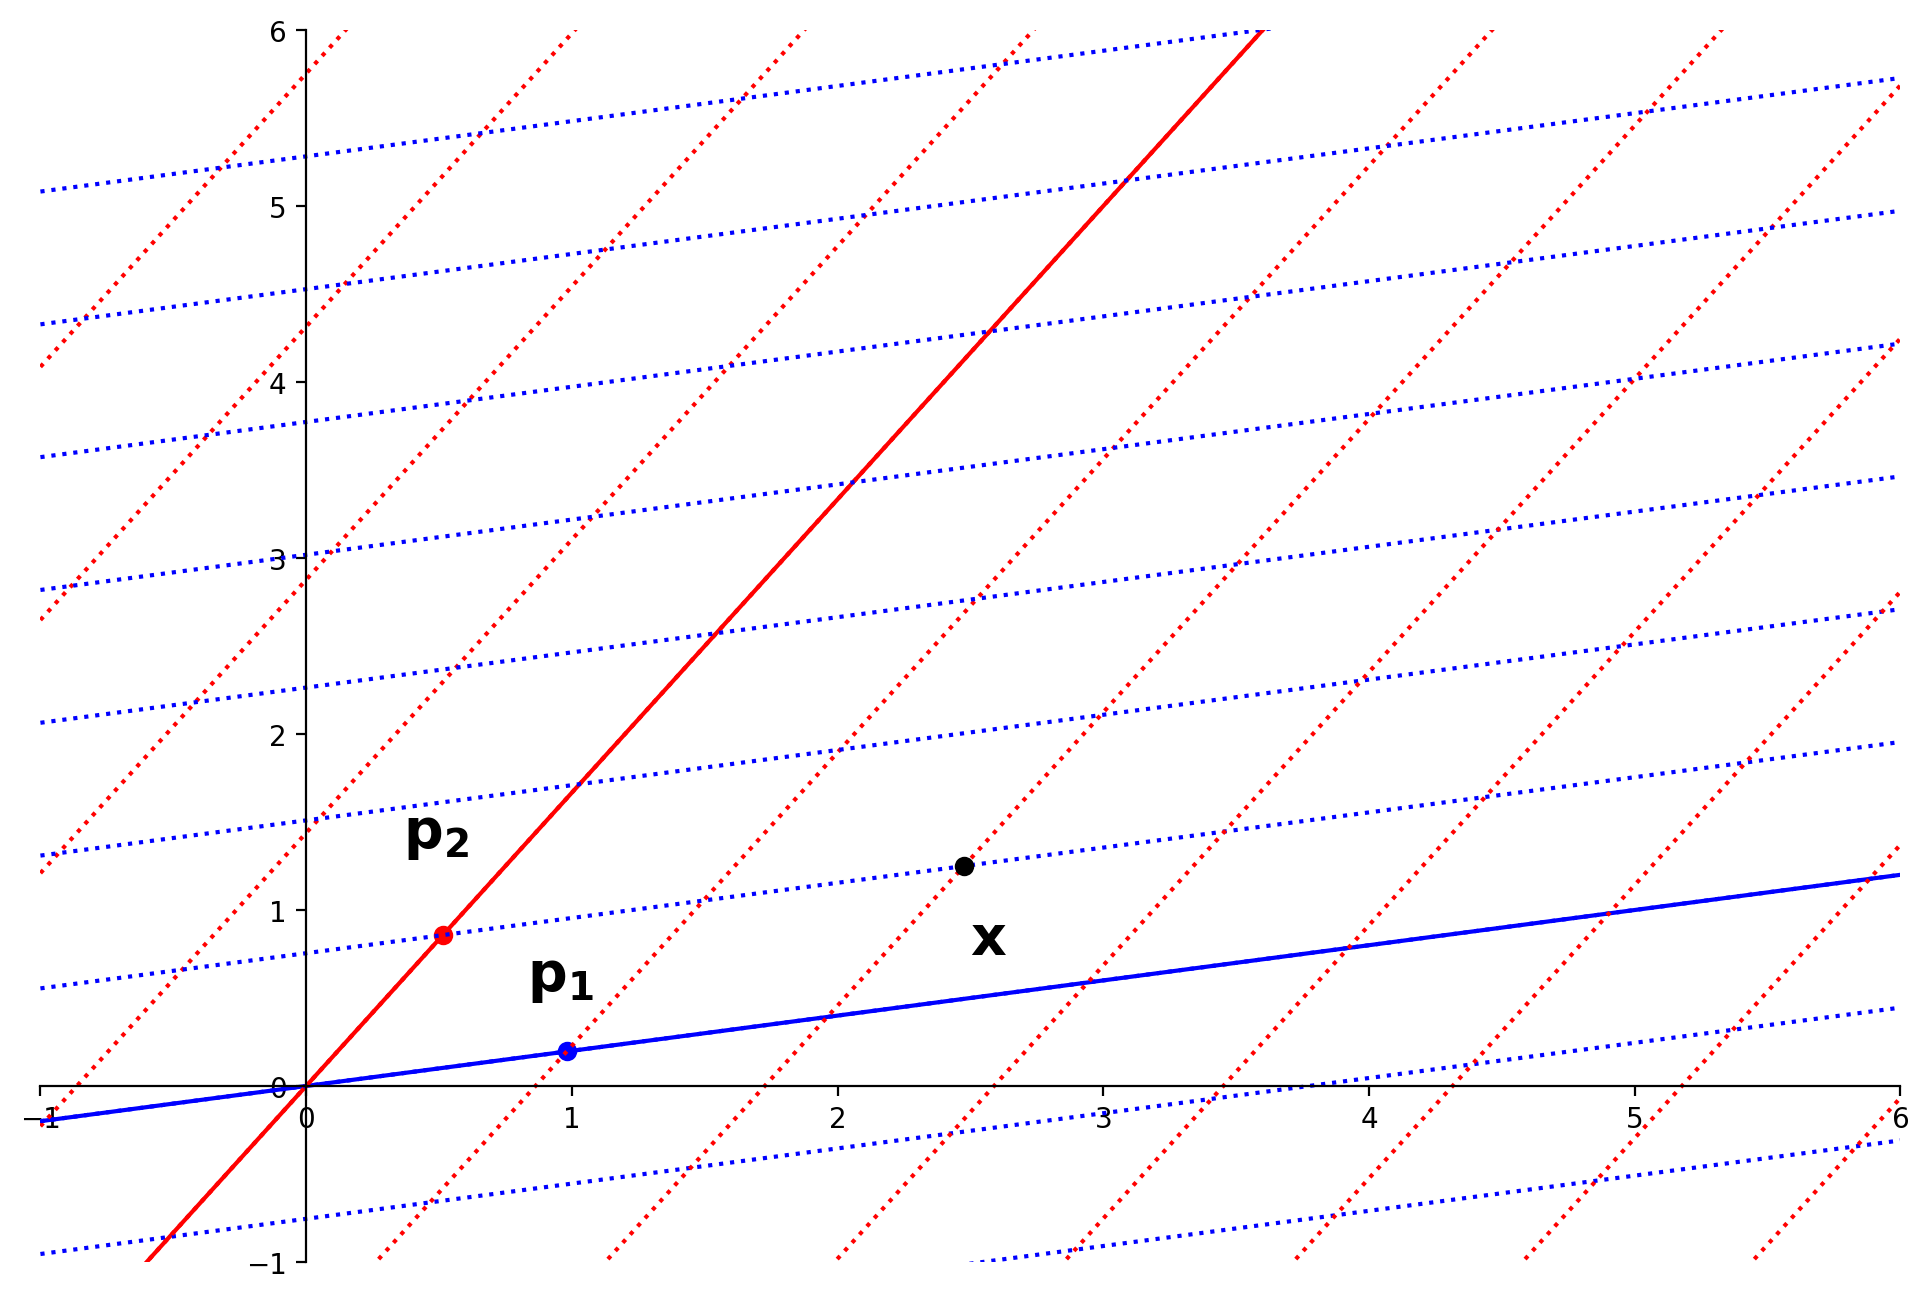

In [3]:
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
ut.plotVec(ax,v1,'b')
ut.plotVec(ax,v2)
ut.plotLinEqn(-v1[1],v1[0],0,color='b')
ut.plotLinEqn(-v2[1],v2[0],0,color='r')
for i in range(-4,8):
    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
#ut.plotVec(ax, p2,'k')
#ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
#                xytext=(p1[0], p1[1]), textcoords='data',
#                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
#                arrowprops={'arrowstyle': 'simple',
#                                'fc': '0.7', 
#                                'ec': 'none',
#                                'connectionstyle' : 'arc3,rad=-0.3'},
#                )
ax.text(2.5,0.75,r'${\bf x}$',size=20)
ax.text(v2[0]-0.15,v2[1]+0.5,r'${\bf p_2}$',size=20)
ax.text(v1[0]-0.15,v1[1]+0.35,r'${\bf p_1}$',size=20)
#ax.text(5.2,2.75,r'$A{\bf x}$',size=16)
ax.plot(0,0,'');

The coordinates of $\mathbf{x}$ in this basis are (2,1).  

In other words $P^{-1}\mathbf{x} = \begin{bmatrix}2\\1\end{bmatrix}.$

Now, we compute $DP^{-1}\mathbf{x}.$  Since $D$ is diagonal, this is just scaling each of the $\mathcal{B}$-coordinates.  

In this example the eigenvalue corresponding to $\mathbf{p}_1$ is 2, and the eigenvalue corresponding to $\mathbf{p}_2$ is 3.

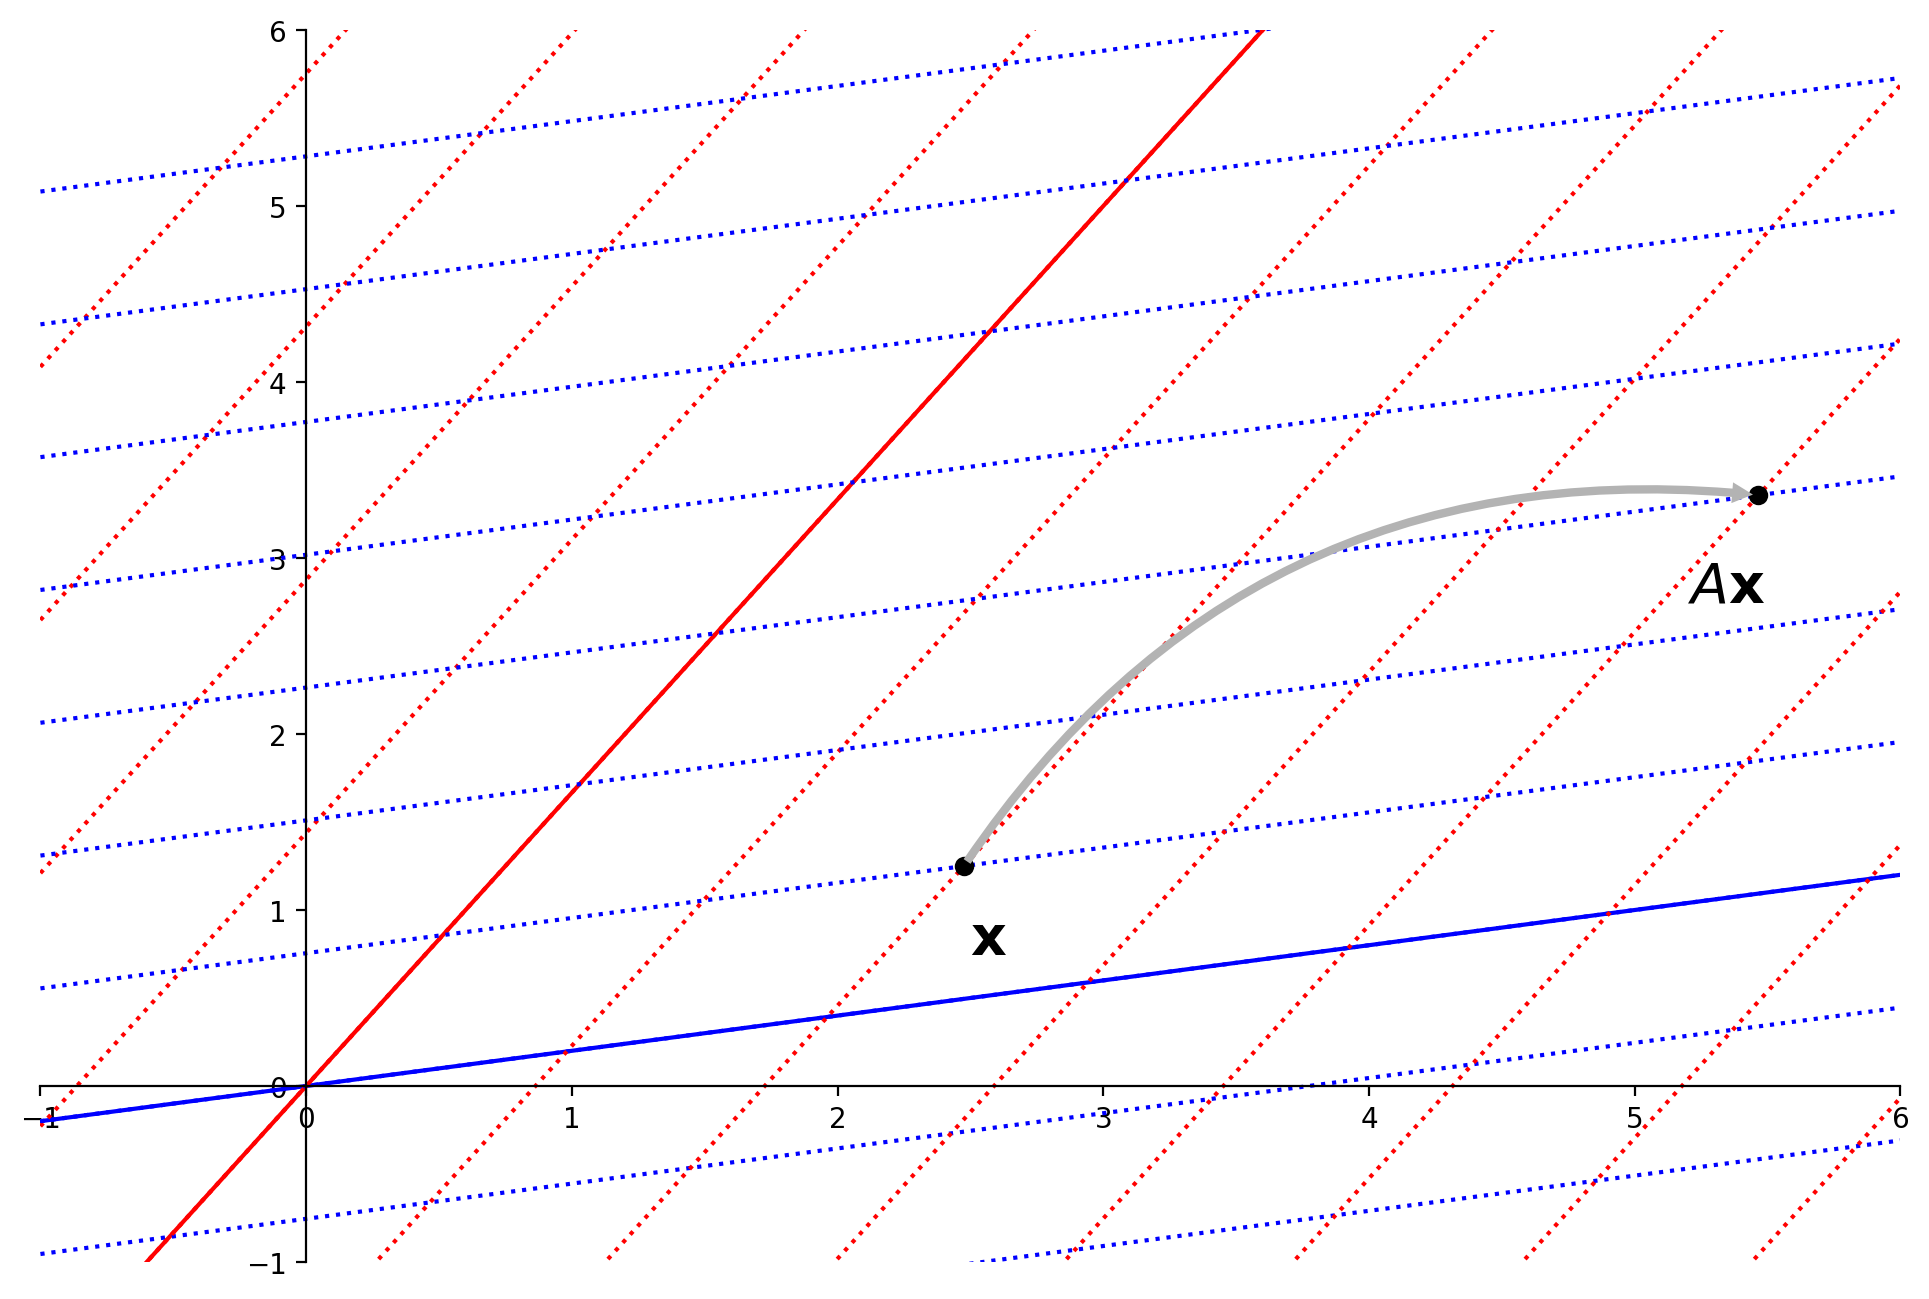

In [4]:
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
#ut.plotVec(ax,v1,'b')
#ut.plotVec(ax,v2)
ut.plotLinEqn(-v1[1],v1[0],0,color='b')
ut.plotLinEqn(-v2[1],v2[0],0,color='r')
for i in range(-4,8):
    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
                xytext=(p1[0], p1[1]), textcoords='data',
                size=15,
                #bbox=dict(boxstyle="round", fc="0.8"),
                arrowprops={'arrowstyle': 'simple',
                                'fc': '0.7', 
                                'ec': 'none',
                                'connectionstyle' : 'arc3,rad=-0.3'},
                )
ax.text(2.5,0.75,r'${\bf x}$',size=20)
ax.text(5.2,2.75,r'$A{\bf x}$',size=20)
ax.plot(0,0,'');

So the coordinates of $A\mathbf{x}$ in the basis $\mathcal{B}$ are 

$$ \begin{bmatrix}2&0\\0&3\end{bmatrix}\begin{bmatrix}2\\1\end{bmatrix} = \begin{bmatrix}4\\3\end{bmatrix}.$$

Now we convert back to the standard basis -- that is, we ask which point has coordinates (4,3) in basis $\mathcal{B}.$


We rely on the fact that if $\mathbf{y}$ has coordinates $\mathbf{x}$ in the basis $\mathcal{B}$, then $\mathbf{y} = P\mathbf{x}.$

So

$$ A\mathbf{x} = P\begin{bmatrix}4\\3\end{bmatrix}$$

$$ = PDP^{-1}\mathbf{x}.$$

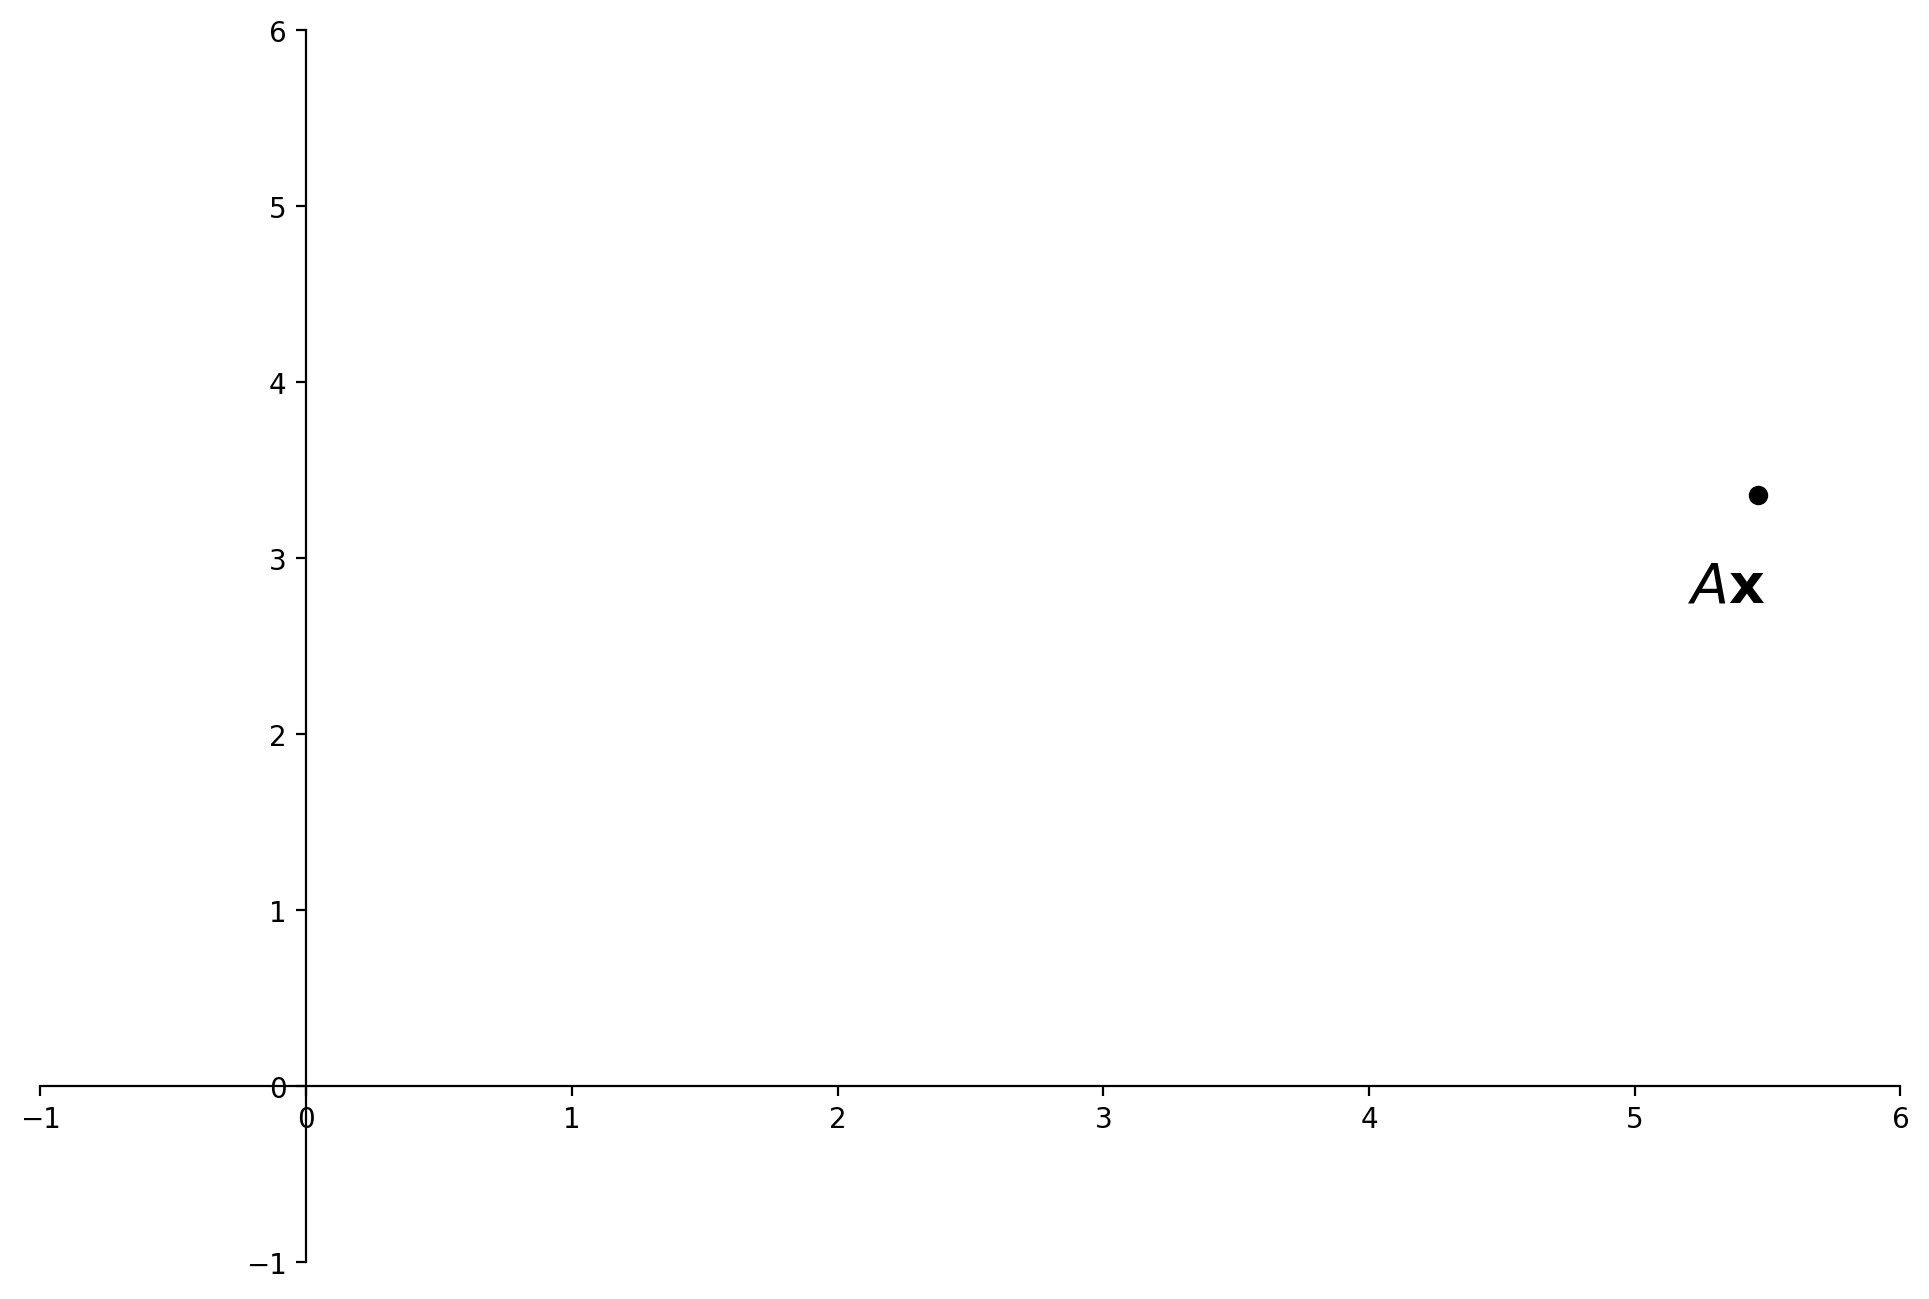

In [5]:
ax = ut.plotSetup(-1,6,-1,6,size=(12,8))
ut.centerAxes(ax)
v1 = np.array([5.0,1.0])
v1 = v1 / np.sqrt(np.sum(v1*v1))
v2 = np.array([3.0,5.0])
v2 = v2 / np.sqrt(np.sum(v2*v2))
#ut.plotVec(ax,v1,'b')
#ut.plotVec(ax,v2)
#ut.plotLinEqn(-v1[1],v1[0],0,color='b')
#ut.plotLinEqn(-v2[1],v2[0],0,color='r')
#for i in range(-3,8):
#    ut.plotLinEqn(-v1[1],v1[0],i*(v1[0]*v2[1]-v1[1]*v2[0]),format=':',color='b')
#    ut.plotLinEqn(-v2[1],v2[0],i*(v2[0]*v1[1]-v2[1]*v1[0]),format=':',color='r')
p1 = 2*v1+v2
p2 = 4*v1+3*v2
#ut.plotVec(ax, p1,'k')
ut.plotVec(ax, p2,'k')
#ax.annotate('', xy=(p2[0], p2[1]),  xycoords='data',
#                xytext=(p1[0], p1[1]), textcoords='data',
#                size=15,
#                #bbox=dict(boxstyle="round", fc="0.8"),
#                arrowprops={'arrowstyle': 'simple',
#                                'fc': '0.7', 
#                                'ec': 'none',
#                                'connectionstyle' : 'arc3,rad=-0.3'},
#                )
#ax.text(2.5,0.75,r'${\bf x}$',size=16)
ax.text(5.2,2.75,r'$A{\bf x}$',size=20)
ax.plot(0,0,'');

We find that $A\mathbf{x}$ = $PDP^{-1}\mathbf{x} = \begin{bmatrix}5.46\\3.35\end{bmatrix}.$

In conclusion: notice that the transformation $\mathbf{x} \mapsto A\mathbf{x}$ may be a complicated one in which each component of $\mathbf{x}$ affects each component of $A\mathbf{x}$.   

However, by changing to the basis defined by the eigenspaces of $A$, the action of $A$ becomes simple to understand. 

Diagonalization of $A$ __changes to a basis in which the action of $A$ is particularly easy to understand and compute with.__

## Exposing the Behavior of a Dynamical System

At the beginning of the last lecture, we looked at a number of examples of 'trajectories' -- the behavior of a dynamic system.

Here is a typical example:

In [6]:
# we put x into a list [x] so that it can be read inside the
# animate() closure.   Currently can only read env variables in a closure

# this is the routine that will be called on each timestep
# relies on A, [x], xvals, yvals, lines as globals
def animate(i):
    newx = A @ x[0]
    x[0] = newx
    xvals.append(x[0][0])
    yvals.append(x[0][1])
    lines[0].set_data(xvals, yvals)
    
def anim_plot(xmin = -500, xmax = 500, ymin = -500, ymax = 500):
    fig, ax = plt.subplots(figsize = (6, 6))
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    plt.plot(xmin, ymin, ''),
    plt.plot(xmax, ymax, '')
    plt.axis('equal')
    #
    # close the figure so that it doesn't separately plot itself
    plt.close()
    return fig, ax

In [7]:
D = np.array([[1.1, 0],[0, 0.9]])
P = np.array([[1,2],[4,1]])
A = P @ D @ np.linalg.inv(P)

x = [np.array([600+5,300+5.])]
xvals = []
yvals = []

fig = plt.figure()
plt.ioff()
size = 400
ax = plt.axes(xlim=(-size,size),ylim=(-size,size))
plt.plot(-size, -size,''),
plt.plot(size, size,'')
plt.axis('equal')
nsteps = 50
lines = ax.plot([],[],'ro-')
plt.close()
# instantiate the animator.
animation.FuncAnimation(fig, 
                        animate, 
                        frames=nsteps, 
                        interval=150, 
                        repeat=False, 
                        blit=False)

This is the behavior of a dynamical system with matrix $A$:

$$ \mathbf{x}_{k+1} = A\mathbf{x}_k $$

with

$$ A = \begin{bmatrix}
0.87142857&0.05714286\\
-0.11428571&1.12857143
\end{bmatrix}
$$

Looking at $A$ does not give us much insight into why this dynamical system is showing its particular behavior.

Now, let's diagonalize $A$:

$$ A = PDP^{-1} $$

and we find that:

$$ P = \begin{bmatrix}
1&2\\
4&1
\end{bmatrix}\;\;\;\;
\mbox{and}\;\;\;\;
D =
\begin{bmatrix}
1.1 & 0\\
0 & 0.9
\end{bmatrix}
$$

The columns of $P$ are eigenvectors of $A$ that correspond to the eigenvalues in $D$.

So the eigenspace corresponding to $\lambda_1 = 1.1$ is Span$\left\{\begin{bmatrix}1\\4\end{bmatrix}\right\}$,

and the eigenspace corresponding to $\lambda_2 = 0.9$ is Span$\left\{\begin{bmatrix}2\\1\end{bmatrix}\right\}$.

Let's look at these eigenspaces:

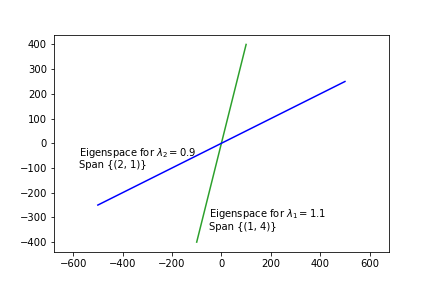

In [8]:
display(Image('images/L18-ex1-static.png'))

Now, the behavior of this dynamical system becomes much clearer!

In [9]:
D = np.array([[1.1, 0],[0, 0.9]])
P = np.array([[1,2],[4,1]])
A = P @ D @ np.linalg.inv(P)

x = [np.array([600+5,300+5.])]
xvals = []
yvals = []

fig = plt.figure()
plt.ioff()
size = 400
ax = plt.axes(xlim=(-size,size),ylim=(-size,size))
plt.plot(-size, -size,''),
plt.plot(size, size,'')
plt.axis('equal')
ev1 = P[:, 0]
line1 = np.column_stack((-100 * ev1, 100 * ev1))
ev2 = P[:, 1]
line2 = np.column_stack((-250 * ev2, 250 * ev2))
plt.plot(line1[0], line1[1], '-')
plt.plot(line2[0], line2[1], '-', color = 'b')
plt.text(-575, -50, r'Eigenspace for $\lambda_2 = 0.9$')
plt.text(-50, -300, r'Eigenspace for $\lambda_1 = 1.1$')
nsteps = 50
lines = ax.plot([],[],'o-')
plt.close()
# instantiate the animator.
animation.FuncAnimation(fig, 
                        animate, 
                        frames=nsteps, 
                        interval=150, 
                        repeat=False, 
                        blit=False)

The initial point has a large component in the blue eigenspace, and a small component in the green eigenspace.

As the system evolves, the blue component shrinks by a factor of 0.9 on each step,

and the green component increases by a factor of 1.1 on each step.

Which allows us to understand very clearly why the dynamical system shows the behavior it does!